In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
boston = datasets.load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
# print(boston.DESCR)

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X = boston.data[:,5]

In [7]:
X.shape

(506,)

In [8]:
y = boston.target

In [9]:
y.shape

(506,)

### 可视化

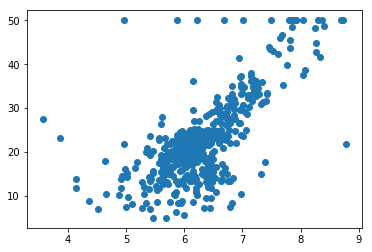

In [10]:
plt.scatter(X, y)
plt.show()

In [11]:
np.max(y)

50.0

In [12]:
# 保留小于50
X = X[y<50.0]
y = y[y<50.0]

In [13]:
X.shape

(490,)

In [14]:
y.shape

(490,)

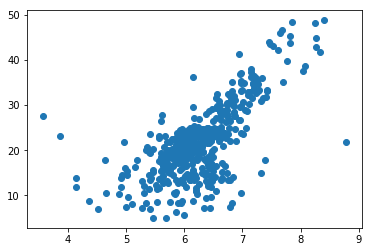

In [15]:
plt.scatter(X, y)
plt.show()

In [16]:
from myscript.train_test_split import train_test_split

In [17]:
X_train, y_train, X_test, y_test = train_test_split(X, y, seed=666)

In [18]:
X_train.shape

(392,)

In [19]:
y_train.shape

(392,)

In [20]:
X_test.shape

(98,)

In [21]:
y_test.shape

(98,)

In [22]:
from myscript.SimpleLinearRegression import SimpleLinearRegression2

In [23]:
reg = SimpleLinearRegression2()

In [24]:
reg.fit(X_train, y_train)

SimpleLinearRegression2()

In [25]:
reg.a_

7.8608543562689555

In [26]:
reg.b_

-27.459342806705543

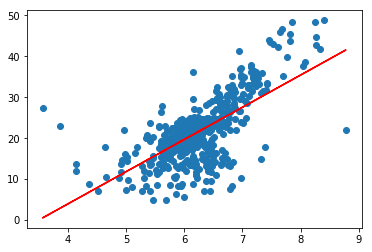

In [27]:
plt.scatter(X, y)
plt.plot(X_train, reg.predict(X_train) ,color='r')
plt.show()

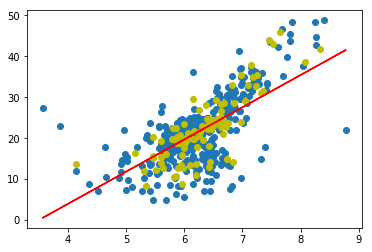

In [28]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color='y')
plt.plot(X_train, reg.predict(X_train) ,color='r')
plt.show()

In [29]:
y_predict = reg.predict(X_test)

# MSE

In [30]:
mse_test = np.sum((y_test-y_predict)**2/len(y_test))
mse_test

24.15660213438744

In [31]:
mse_test2 = (y_test-y_predict).dot(y_test-y_predict)/len(y_test)
mse_test2

24.15660213438744

# RMSE

In [32]:
from math import sqrt

In [33]:
rmse_test = sqrt(mse_test2)
rmse_test

4.914936635846636

# MAE

In [34]:
mae_test = np.sum(np.absolute(y_test-y_predict)/len(y_test))
mae_test

3.543097440946387

## 调用自己的评测函数

In [35]:
from myscript.metrics import mean_squared_error

In [36]:
mean_squared_error(y_test, y_predict)

24.15660213438744

In [37]:
# sklearn中的MSE he MAE

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [40]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

In [41]:
from myscript.metrics import r2_score

In [42]:
r2_score(y_test, y_predict)

0.6129316803937321

In [43]:
# sklearn里的r2
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test, y_predict)

0.6129316803937324

In [45]:
reg.score(X_test, y_test)

0.6129316803937321